<a href="https://colab.research.google.com/github/prathima2707/machine-learning/blob/main/financial_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
* The objective of this exercise is to identify a fraudlent transaction as accurately as possible.
* Compare different models based on their performance

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Import neccessary libraries

In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
## to ignore waarning
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)

##### Load the dataset

In [57]:
data = pd.read_csv("/fraud detection csv file.csv")

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


#### Exploratory Data Analysis

In [58]:
print("Number of records:\t\t",data.shape[0])
print("Number of features per record:\t",data.shape[1])

Number of records:		 56203
Number of features per record:	 11


In [59]:
print("Any missing data?",data.isnull().sum().any())

Any missing data? True


In [60]:
#print("% of Valid transactions:",round(data.isFraud.value_counts()[0]/data.shape[0] * 100,2))
#print("% of Fraud transactions:",round(data.isFraud.value_counts()[1]/data.shape[0] * 100,2))

print("No of Valid transactions:",data.isFraud.value_counts()[0],'which is ',round(data.isFraud.value_counts()[0]/data.shape[0] * 100,2),'%')
print("No of Fraud transactions:",data.isFraud.value_counts()[1],'which is ',round(data.isFraud.value_counts()[1]/data.shape[0] * 100,2),'%')

data.isFraud.value_counts()

No of Valid transactions: 56102 which is  99.82 %
No of Fraud transactions: 100 which is  0.18 %


0.0    56102
1.0      100
Name: isFraud, dtype: int64

In [61]:
'''print("No of transactions Flagged as Valid:",data.isFlaggedFraud.value_counts()[0])
print("No of transactions Flagged as Fraud:",data.isFlaggedFraud.value_counts()[1])'''

'print("No of transactions Flagged as Valid:",data.isFlaggedFraud.value_counts()[0])\nprint("No of transactions Flagged as Fraud:",data.isFlaggedFraud.value_counts()[1])'

In [62]:
print("No of transactions Flagged as Valid:", data['isFlaggedFraud'].value_counts().get(0, 0))
print("No of transactions Flagged as Fraud:", data['isFlaggedFraud'].value_counts().get(1, 0))


No of transactions Flagged as Valid: 56202
No of transactions Flagged as Fraud: 0


In [63]:
print("Are there any mismatch in the balance at origin and destination after transaction?")
data['error_orig'] = (data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"]).astype(int)
data['error_dest'] = (data["oldbalanceDest"] + data["amount"] != data["newbalanceDest"]).astype(int)

print("Balance Error(%) at the origin:",round(data['error_orig'].value_counts()[1]/data.shape[0] * 100,2))
print("Balance Error(%) at the destination:",round(data['error_dest'].value_counts()[1]/data.shape[0] * 100,2))

#print("Valid Balance(%) at the origin:",round(data['error_orig'].value_counts()[0]/data.shape[0] * 100,2))
#print("Valid Balance(%) at the dest:",round(data['error_dest'].value_counts()[0]/data.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the origin: 78.82
Balance Error(%) at the destination: 93.68


##### Appears the Fraud occurs both at sending and receiving ends

In [64]:
'''print("Any transaction with amount less than or equal to 0?")
print(len(data[data.amount<=0]))
print("What type of transactions are they?")
print(data[data.amount<=0]['type'].value_counts().index[0])
print("Are all these marked as Fraud Transactions?")
data[data.amount<=0]['isFraud'].value_counts()[1] == len(data[data.amount<=0])'''

'print("Any transaction with amount less than or equal to 0?")\nprint(len(data[data.amount<=0]))\nprint("What type of transactions are they?")\nprint(data[data.amount<=0][\'type\'].value_counts().index[0])\nprint("Are all these marked as Fraud Transactions?")\ndata[data.amount<=0][\'isFraud\'].value_counts()[1] == len(data[data.amount<=0])'

In [65]:
print("Any transaction with amount less than or equal to 0?")
amount_less_than_or_equal_to_zero = data[data.amount <= 0]

if not amount_less_than_or_equal_to_zero.empty:
    print(len(amount_less_than_or_equal_to_zero))

    print("What type of transactions are they?")
    most_common_type = amount_less_than_or_equal_to_zero['type'].value_counts().index[0]
    print(most_common_type)

    print("Are all these marked as Fraud Transactions?")
    all_fraud = amount_less_than_or_equal_to_zero['isFraud'].all()
    print(all_fraud)
else:
    print("No")


Any transaction with amount less than or equal to 0?
No


In [67]:
data_temp = data[data.isFlaggedFraud == 1]

print("How many fraud transactions are Flagged?")
print("\t", len(data_temp))

if not data_temp.empty:
    print("What type of transactions are they?")
    most_common_type = data_temp['type'].value_counts().index[0]
    print("\t", most_common_type)

    print("Are all these flagged also marked as Fraud Transactions?")
    all_fraud = data_temp['isFraud'].value_counts().get(1, 0) == len(data_temp)
    print("\t", all_fraud)

    print("Minimum amount transferred in these transactions")
    print("\t", data_temp.amount.min())

    print("Maximum amount transferred in these transactions")
    print("\t", data_temp.amount.max())
else:
    print("No transactions flagged as fraud.")


How many fraud transactions are Flagged?
	 0
No transactions flagged as fraud.


### All the fraud trnasactions belong to Transfer or Cash-out type, so discard data corresponding to other types

In [68]:
data = data.loc[(data['type'].isin(['TRANSFER', 'CASH_OUT']))]
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error_orig,error_dest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1.0,0.0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1.0,0.0,0,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0.0,0.0,1,1
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0.0,0.0,1,1
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0.0,0.0,1,1


## Data Visualization

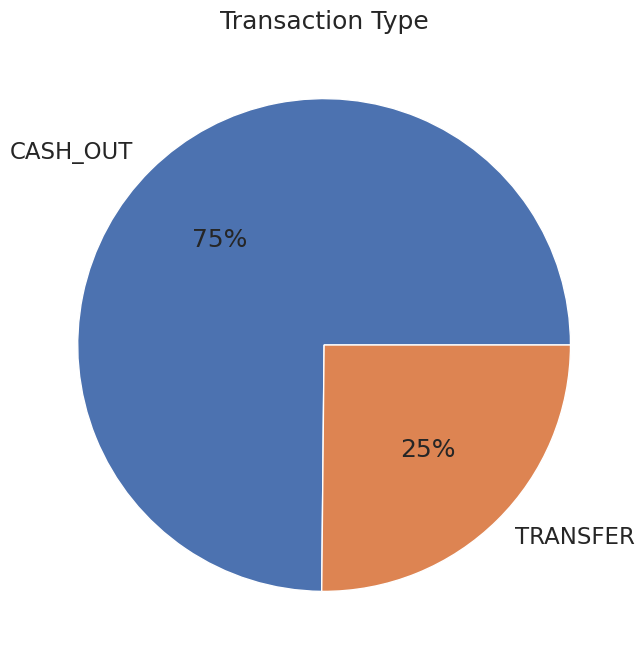

In [69]:
#create pie chart
plt.figure(figsize=(10,8))
plt.pie(data.type.value_counts().values,labels=data.type.value_counts().index,  autopct='%.0f%%')
plt.title("Transaction Type")
plt.show()

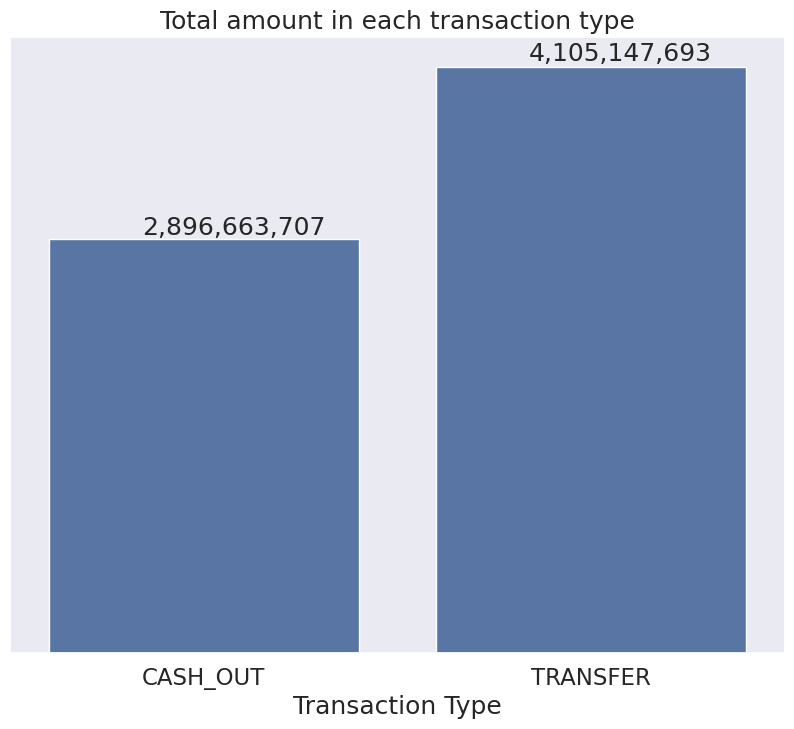

In [70]:
d = data.groupby('type')['amount'].sum()
plt.figure(figsize=(10,8))
ax = sns.barplot(x=d.index,y=d.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))

plt.title("Total amount in each transaction type")
plt.yticks([])
plt.xlabel("Transaction Type")
plt.show()

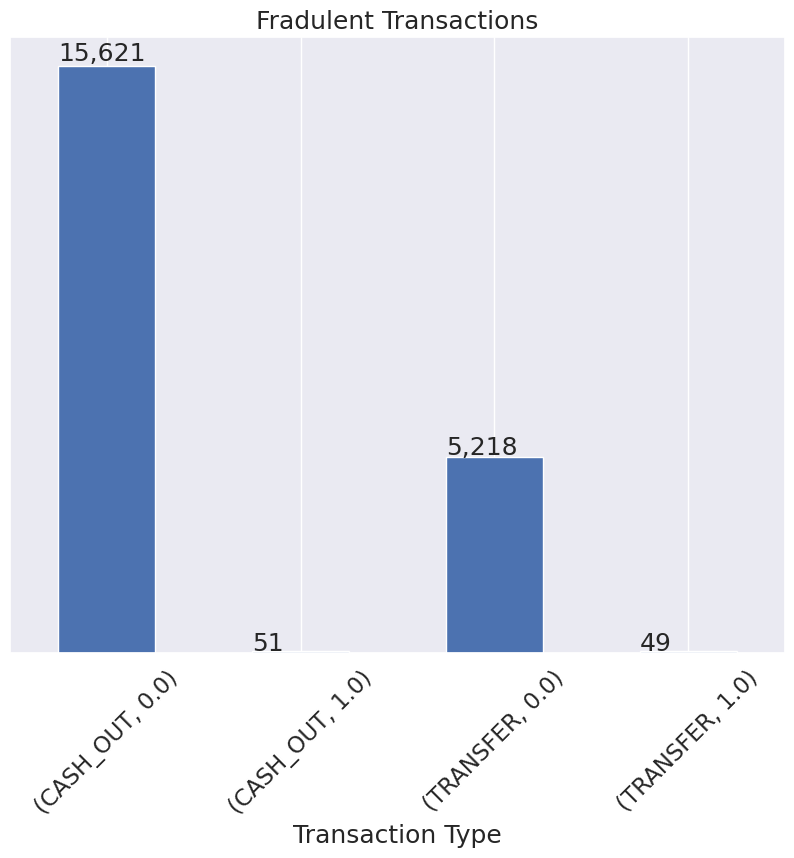

In [71]:
plt.figure(figsize=(10,8))
ax = data.groupby(['type','isFraud']).size().plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.title("Fradulent Transactions")
plt.xlabel("Transaction Type")
plt.yticks([])
#plt.xticks([' Valid CashOut','Fraud CashOut','Valid Transfer','Fraud Transfer'])
plt.xticks(rotation=45)
plt.show()

#### Delete unwanted features (Remove isFlaggedFraud and keep isFraud as target feature)

In [72]:
data.drop(['step','type','nameOrig','nameDest','error_orig','error_dest','isFlaggedFraud'],axis=1,inplace=True)
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,181.00,181.0,0.0,0.0,0.00,1.0
3,181.00,181.0,0.0,21182.0,0.00,1.0
15,229133.94,15325.0,0.0,5083.0,51513.44,0.0
19,215310.30,705.0,0.0,22425.0,0.00,0.0
24,311685.89,10835.0,0.0,6267.0,2719172.89,0.0


#### Standardizing all the continuous values to be between 0 and 1

In [73]:
ss = StandardScaler()

data.amount         = ss.fit_transform(data[['amount']])
data.oldbalanceOrg  = ss.fit_transform(data[['oldbalanceOrg']])
data.oldbalanceDest = ss.fit_transform(data[['oldbalanceDest']])
data.newbalanceOrig = ss.fit_transform(data[['newbalanceOrig']])
data.newbalanceDest = ss.fit_transform(data[['newbalanceDest']])

In [74]:
X = data.drop(["isFraud"],axis=1)
y = data.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15704, 5), (5235, 5), (15704,), (5235,))

In [75]:
# Function to create a confusion matrix
def conf_matrix(y_test, pred_test):

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix

    plt.figure(figsize=(6,6))
    plt.title("Confusion Matrix")
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)


How many class does the model predict? [0. 1.]
Numbers in each class:		 0 : 5233
		 1 : 2
f1 score: 0.14814814814814814
Accuracy of this model: 0.9956064947468959


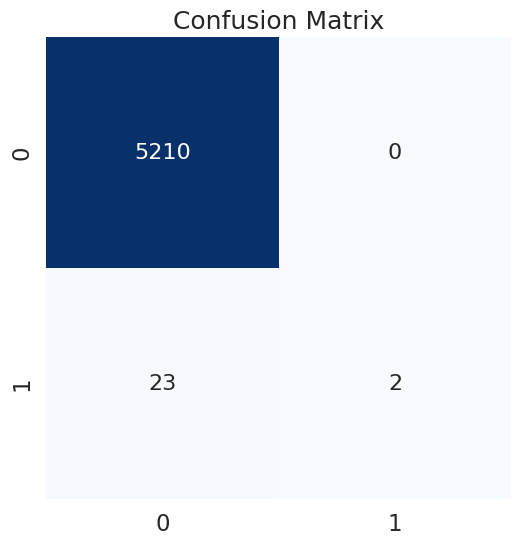

In [76]:
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("How many class does the model predict?",np.unique( lr_pred ))
print("Numbers in each class:\t\t","0 :",len(lr_pred[lr_pred==0]))
print("\t\t 1 :",len(lr_pred[lr_pred==1]))

f1score = f1_score(y_test, lr_pred)
print('f1 score:', f1score)

conf_matrix(y_test, lr_pred)

acc_lr= accuracy_score(y_test, lr_pred)
print("Accuracy of this model:", acc_lr)

## Since the dataset extremely imbalanced, some workaround can be done to overcome this. Below are all the methods listed

# 1. Up-sample Minority Class
    Randomly duplicate the data from the minority class.

In [77]:
n = data.isFraud.value_counts()[0]

# Separate majority and minority classes
df_majority = data[data.isFraud==0]
df_minority = data[data.isFraud==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=n,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print("The new class count are :")
df_upsampled.isFraud.value_counts()

The new class count are :


0.0    20839
1.0    20839
Name: isFraud, dtype: int64

f1 score for the testing data:	 0.8865722177670855
Accuracy of thie model:		 0.877831094049904


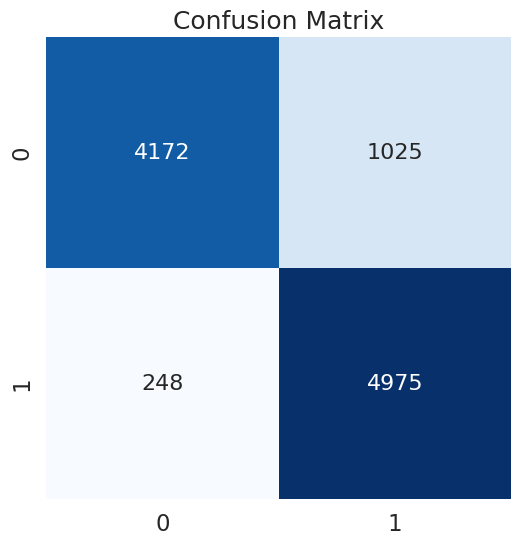

In [78]:
X = df_upsampled.drop(["isFraud"],axis = 1)
y = df_upsampled.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

# Predicting on the test data
up_scale_pred = lr.predict(X_test)

#Calculating and printing the f1 score
f1up_scale_pred = f1_score(y_test, up_scale_pred)
print('f1 score for the testing data:\t', f1up_scale_pred)

#Calling function
conf_matrix(y_test,up_scale_pred)

acc_up_scale=accuracy_score(y_test, up_scale_pred)
print("Accuracy of thie model:\t\t",acc_up_scale)


# 2. Down-sample Majority Class
     Randomly remove data from the majority class

In [79]:
n = data.isFraud.value_counts()[1]

# Separate majority and minority classes

df_majority = data[data.isFraud==0]
df_minority = data[data.isFraud==1]


# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=n,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

print("The new class count are:")
print(df_downsampled.isFraud.value_counts())

The new class count are:
0.0    100
1.0    100
Name: isFraud, dtype: int64


How many class does the model predict? [0. 1.]
Count in each class:			 0 : 77
					 1 : 123
f1 score for the testing data:		 0.8609865470852018
Accuracy of the model:			 0.845


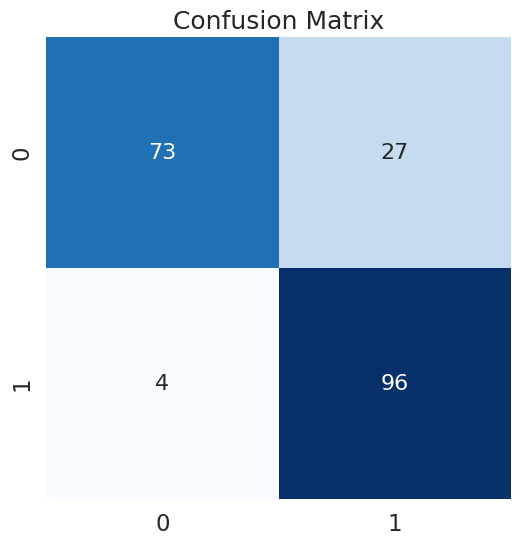

In [80]:
# Separate input features (X) and target variable (y)
y = df_downsampled.isFraud
X = df_downsampled.drop(['isFraud'], axis=1)

# Train model
lr = LogisticRegression().fit(X, y)

# Predict on training set
down_scale_pred = lr.predict(X)

print("How many class does the model predict?",np.unique( down_scale_pred ))
print("Count in each class:\t\t\t","0 :",len(down_scale_pred[down_scale_pred==0]))
print("\t\t\t\t\t 1 :",len(down_scale_pred[down_scale_pred==1]))

#Calculating and printing the f1 score
f1down_scale_pred = f1_score(y, down_scale_pred)
print('f1 score for the testing data:\t\t', f1down_scale_pred)

conf_matrix(y, down_scale_pred)

acc_down_scale=accuracy_score(y, down_scale_pred)
print("Accuracy of the model:\t\t\t", acc_down_scale)


# 3. Tree-Based Algorithms

In [81]:
# Separate input features (X) and target variable (y)
y = data.isFraud
X = data.drop(['isFraud'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# Predict on training set
rfc_pred = rfc.predict(X_test)

AUROC:			 0.9429006155938824
f1 score:		 0.4848484848484849
Accuracy of the model:	 0.9967526265520534


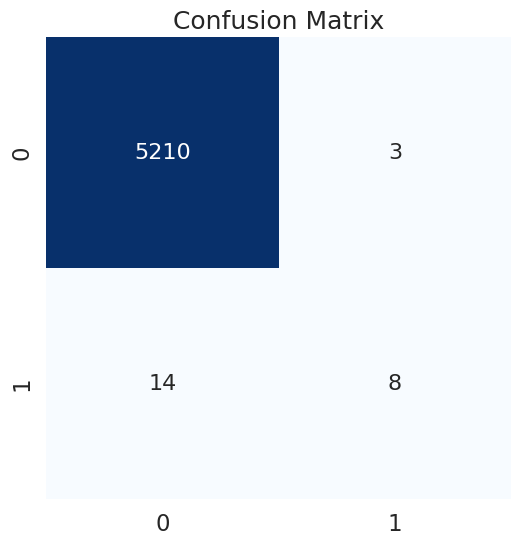

In [82]:

prob_y = rfc.predict_proba(X_test)
prob_y = [p[1] for p in prob_y]

print("AUROC:\t\t\t",roc_auc_score(y_test, prob_y))

f1_rfc = f1_score(y_test, rfc_pred)
print('f1 score:\t\t', f1_rfc)

conf_matrix(y_test, rfc_pred)

acc_rfc=accuracy_score(y_test, rfc_pred)
print("Accuracy of the model:\t", acc_rfc)


In [83]:
data = {'Model':['Logistic Regression','UpScale Logistic Regression','DownScale Logistic Regression','RandomForest'],
        'f1 score':[f1score,f1up_scale_pred,f1down_scale_pred,f1_rfc],
        'Accuracy Score':[acc_lr,acc_up_scale,acc_down_scale,acc_rfc]}

comparision_table=pd.DataFrame(data)
print(comparision_table)

                           Model  f1 score  Accuracy Score
0            Logistic Regression  0.148148        0.995606
1    UpScale Logistic Regression  0.886572        0.877831
2  DownScale Logistic Regression  0.860987        0.845000
3                   RandomForest  0.484848        0.996753
